In [1]:
import os
import pickle
import glob
import json

import numpy as np
import pandas as pd
from itertools import combinations
from scipy.optimize import curve_fit

%matplotlib inline

In [2]:
ex_json = '10.1021Jp908247w.isotherm5.json'

In [3]:
with open(ex_json, 'r') as js:
    js_data = json.load(js)

FileNotFoundError: [Errno 2] No such file or directory: '10.1021Jp908247w.isotherm5.json'

In [ ]:
js_data.keys()

In [ ]:
js_data['isotherm_data'][0]['species_data'][0]['composition']

In [2]:
%%time

isotherms_data_folder = r'downloaded'
total = []

for json_file in glob.glob(isotherms_data_folder + r'\*.json'):
#     print(json_file)

    #read
    with open(json_file, 'r') as json_inp:
        json_data = json.load(json_inp)

    # check if only single substance was adsorbed
    if json_data['isotherm_data'][0]['species_data'][0]['composition'] != 1:
        continue
    
    category = json_data['category']
    adsorbent = json_data['adsorbent']['name']
    adsorbate = json_data['adsorbates'][0]['name']
    temperature = json_data['temperature']
    doi = json_data['DOI']
    p_units = json_data['pressureUnits']
    ads_units = json_data['adsorptionUnits']
    pressure = [d['pressure'] for d in json_data['isotherm_data']]
    adsorption = [d['total_adsorption'] for d in json_data['isotherm_data']]

    total.append([doi, category,
                  adsorbent, adsorbate, temperature,
                  p_units, ads_units, pressure, adsorption])

Wall time: 571 ms


In [116]:
df_sum = pd.DataFrame(total, columns=['doi', 'category',
                                      'adsorbent', 'adsorbate', 'temperature',
                                      'p_units', 'ads_units', 'pressure', 'adsorption'])

In [25]:
df_sum['ads_units'].value_counts()

mmol/g                        1558
cm3(STP)/g                     790
wt%                            143
molecules/unitcell             110
mg/g                            98
ml/g                            44
cm3(STP)/cm3                    38
mmol/cm3                        38
mol/mol                         18
mol/m3                          16
mol/l                           10
mg/m2                            8
kmol/m3                          7
                                 6
molecules/cage                   6
cm3/m2                           5
molecules/Cu2 unit               3
molecules/Rh2 unit               3
molecules/8 unit cells           3
molecules/nm2                    2
Guest molecules per Cu ion       2
mol/g                            2
g/l                              2
mmol/m2                          2
mmol/kg                          1
molecules/formula unit           1
molecules/pore                   1
mol/m2                           1
Name: ads_units, dty

In [119]:
df3 = df_sum.copy()
# df3 = df3.drop(df3[df3['ads_units'] != 'mmol/g'].index)
 
df3 = df3[df3.index.isin(list(df3[df3['ads_units'] == 'mmol/g'].index) + list(df3[df3['ads_units'] == 'cm3(STP)/g'].index)+ list(df3[df3['ads_units'] == 'ml/g'].index))]
# + df3[df3['ads_units'] == 'cm3(STP)/g'].index
df3['ads_units'].value_counts()

mmol/g        1558
cm3(STP)/g     790
ml/g            44
Name: ads_units, dtype: int64

In [120]:
df33 = df3.dropna()
for i, row in df33.iterrows():
    if row['ads_units'] == 'cm3(STP)/g' or row['ads_units'] == 'ml/g':
        try:
            new_value = np.true_divide(row['adsorption'], 22.4)
        except:
            new_value = np.nan
        df33.at[i,'adsorption'] = new_value
    else:
        if None in row['adsorption']:
            df33.at[i,'adsorption'] = np.nan

In [121]:
df33 = df33.dropna()
print(df33['ads_units'].value_counts())
df33.to_excel("output_df3.xlsx")  

mmol/g        1281
cm3(STP)/g     742
ml/g            41
Name: ads_units, dtype: int64


In [122]:
df_sum = df33.copy()

In [4]:
df_sum.to_excel("output.xlsx")  

In [95]:
from IPython.display import display, HTML
df_sum2 = pd.DataFrame(total, columns=['doi', 'category',
                                      'adsorbent', 'adsorbate', 'temperature',
                                      'p_units', 'ads_units', 'pressure', 'adsorption'])
# df1 = df_sum2.iloc[[0],:] 

# df1['doi'] = "https://doi.org/"+ df1['doi']
# if df1['category'].item() == '':
#     df1['category'] = "theor"
# pr = df1['pressure'].to_list()[0]
# ad = df1['adsorption'].to_list()[0]
# df1['pressure'] = pr[0]
# df1['adsorption'] = ad[0]
# pr.pop(0)
# ad.pop(0)

# for i, num in enumerate(pr):
#     df1.loc[df1.shape[0]] = [None, None, None, None, None, None, None, num, ad[i]]
# df_sum2.drop([0,0])
pdlist = []
for i in range(df_sum2.shape[0]):
    df_temp = df_sum2.iloc[[i],:] 
    df_temp['doi'] = "https://doi.org/"+ df_temp['doi']
    if df_temp['category'].item() == '':
        df_temp['category'] = "theor"
    pr = df_temp['pressure'].to_list()[0]
    ad = df_temp['adsorption'].to_list()[0]
    df_temp['pressure'] = pr[0]
    df_temp['adsorption'] = ad[0]   
    pr.pop(0)
    ad.pop(0)
    for j, num in enumerate(pr):
        df_temp.loc[df_temp.shape[0]] = [None, None, None, None, None, None, None, num, ad[j]]
    pdlist.append(df_temp)
print(len(pdlist))
# df1 = df1.to_frame()
# df1['pressure'] = df_pr
# display(HTML(df1.to_html()))
# df1.to_excel("output2.xlsx")  
#df1, df_pr, df_ad
new_df = pd.concat(pdlist)
new_df.to_excel("output2.xlsx")  

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

2918


In [84]:
writer = pd.ExcelWriter('CO2_adso.xlsx', engine='xlsxwriter')
df_sum.head(10)
#https://doi.org/

,doi,category,adsorbent,adsorbate,temperature,p_units,ads_units,pressure,adsorption
0,10.1002/adfm.201101479,,Zn(BDC)(DMBPY) 0.5,Carbon Dioxide,288,bar,wt%,"[0.256027, 0.326603, 0.408949, 0.508906, 0.573...","[2.09091, 2.45455, 2.90909, 3.31818, 3.54545, ..."
1,10.1002/adfm.201101479,,Zn(BDC)(DMBPY) 0.5,Carbon Dioxide,298,bar,wt%,"[0.0352769, 0.0617317, 0.0823127, 0.102894, 0....","[0.136364, 0.227273, 0.318182, 0.409091, 0.5, ..."
2,10.1002/adfm.201101479,,Zn(BDC)(DMBPY) 0.5,Carbon Dioxide,303,bar,wt%,"[0.0324727, 0.0443168, 0.0591063, 0.0827219, 0...","[0.0736051, 0.136862, 0.200088, 0.252659, 0.31..."
3,10.1002/adfm.201101479,,Zn(BDC)(DMBPY) 0.5,Carbon Dioxide,308,bar,wt%,"[0.0206494, 0.038374, 0.0619999, 0.0826804, 0....","[0.0314749, 0.084107, 0.147241, 0.210406, 0.26..."
4,10.1002/adfm.201101479,,Zn(NDC)(DMBPY) 0.5,Carbon Dioxide,288,bar,wt%,"[0.0248629, 0.044189, 0.0635256, 0.0800832, 0....","[0.0767105, 0.153338, 0.214698, 0.291283, 0.39..."
5,10.1002/adfm.201101479,,Zn(NDC)(DMBPY) 0.5,Carbon Dioxide,298,bar,wt%,"[0.0414945, 0.0636101, 0.0801995, 0.0995361, 0...","[0.0464267, 0.0925615, 0.123346, 0.184706, 0.2..."
6,10.1002/adfm.201101479,,Zn(BDC)(BPY) 0.5,Carbon Dioxide,288,bar,wt%,"[0.0332213, 0.0609057, 0.0802848, 0.102432, 0....","[0.14592, 0.218679, 0.273274, 0.346134, 0.4372..."
7,10.1002/adfm.201101479,,Zn(BDC)(BPY) 0.5,Carbon Dioxide,298,bar,wt%,"[0.0470635, 0.0664426, 0.0802848, 0.102432, 0....","[0.0357793, 0.0537441, 0.108439, 0.144669, 0.1..."
8,10.1002/adfm.201101479,,Zn(NDC)(BPY) 0.5,Carbon Dioxide,288,bar,wt%,"[0.0305712, 0.047241, 0.0611325, 0.0805807, 0....","[0.256496, 0.384715, 0.491564, 0.641153, 0.769..."
9,10.1002/adfm.201101479,,Zn(NDC)(BPY) 0.5,Carbon Dioxide,298,bar,wt%,"[0.0249751, 0.0416251, 0.0582949, 0.0804818, 0...","[0.128043, 0.213405, 0.341624, 0.426869, 0.533..."


In [123]:
from itertools import combinations
from scipy.optimize import curve_fit

In [124]:
def freundlich_langmuir_model(p, g_inf, K, n):
    return (g_inf * (K*p)**n)/(1 + (K*p)**n)

In [125]:
def fit_isotherm(pressure, adsorption, model, model_parameters_bounds=(0, [np.inf, np.inf, np.inf])):
    """
    curve_fit function from SciPy
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
    """
    curve = [np.nan, np.nan, np.nan]

    try:
        curve, _ = curve_fit(f=model, xdata=pressure, ydata=adsorption,
                             bounds=model_parameters_bounds)
    except RuntimeError:
        pass
    except ValueError:
        pass
    finally:
        return curve

In [126]:
%%time
df_sum['g_inf'], df_sum['K'], df_sum['n'] = zip(*df_sum[['pressure', 'adsorption']].apply(lambda data: fit_isotherm(data[0],
                                                                                                                    data[1],
                                                                                                                    freundlich_langmuir_model),
                                                                                          axis=1))

<ipython-input-124-8c7ca163123f>:2: RuntimeWarning: invalid value encountered in power
  return (g_inf * (K*p)**n)/(1 + (K*p)**n)
C:\ProgramData\Anaconda3\NewAnaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Wall time: 13.7 s


In [127]:
df_sum.head(50)

,doi,category,adsorbent,adsorbate,temperature,p_units,ads_units,pressure,adsorption,g_inf,K,n
14,10.1002/adfm.201200084,,NH2-MIL-53(Al),Carbon Dioxide,273,bar,cm3(STP)/g,"[0.42318, 0.676969, 1.01993, 1.36288, 1.70644,...","[1.0811554388684757e-18, 1.7418661197000304e-1...",0.011212,0.013833,8.187949
15,10.1002/adfm.201200084,,NH2-MIL-53(Al),Carbon Dioxide,298,bar,cm3(STP)/g,"[0.678881, 1.35654, 1.86693, 2.54398, 3.22102,...","[2.734816731384602e-19, 5.013834837205849e-19,...",0.005646,0.007321,6.909605
16,10.1002/adfm.201300071,,CCT1,Carbon Dioxide,273,bar,cm3(STP)/g,"[0.0126608, 0.0422383, 0.0746326, 0.112661, 0....","[2.744820422174724e-19, 8.162587058662566e-19,...",0.458507,0.510883,17.296806
17,10.1002/adfm.201300071,,CCT1,Carbon Dioxide,273,bar,cm3(STP)/g,"[0.0182946, 0.0408298, 0.0816749, 0.129562, 0....","[2.533743795403398e-19, 6.122133873531566e-19,...",0.448272,0.501766,15.414874
18,10.1002/adfm.201300071,,CT,Carbon Dioxide,273,bar,cm3(STP)/g,"[0.0408298, 0.0999848, 0.161957, 0.218295, 0.2...","[5.277802388441795e-19, 9.71052395165973e-19, ...",0.455979,0.507745,15.646753
19,10.1002/adfm.201300071,,CCT1,Carbon Dioxide,273,bar,cm3(STP)/g,"[0.0112524, 0.0816749, 0.161957, 0.221112, 0.2...","[2.744820422174724e-19, 8.936555505161148e-19,...",0.458802,0.510762,15.803037
20,10.1002/adfm.201300071,,CCT1,Carbon Dioxide,273,bar,cm3(STP)/g,"[0.0112524, 0.078858, 0.130971, 0.192943, 0.28...","[2.744820422174724e-19, 7.318255573572795e-19,...",0.459253,0.510146,15.817659
21,10.1002/adfm.201300071,,CCT1,Carbon Dioxide,273,bar,cm3(STP)/g,"[0.0689988, 0.15914, 0.221112, 0.280266, 0.339...","[2.3930177182210256e-19, 4.996362723079284e-19...",0.461873,0.512393,16.009508
22,10.1002/adfm.201300071,,CCT1,Carbon Dioxide,273,bar,cm3(STP)/g,"[0.0422383, 0.0999848, 0.161957, 0.250689, 0.3...","[8.450883186252016e-20, 2.1115780528585146e-19...",0.460918,0.511902,15.874033
23,10.1002/adfm.201300071,,CT,Carbon Dioxide,273,bar,cm3(STP)/g,"[0.02252, 0.0661819, 0.160548, 0.253506, 0.345...","[1.1968910225788993e-19, 2.744820422174724e-19...",0.461118,0.512855,16.031269


In [128]:
df_sum['ads_units'].value_counts()

mmol/g        1281
cm3(STP)/g     742
ml/g            41
Name: ads_units, dtype: int64

In [129]:
df_sum3 = df_sum.dropna()
df_sum3.reset_index()
df_sum3['doi'] = "https://doi.org/"+ df_sum3['doi']
df_sum3.to_excel("CO2_mmol_g.xlsx")  

<ipython-input-129-bbbc04caaf0c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum3['doi'] = "https://doi.org/"+ df_sum3['doi']


In [132]:
df_sum3.shape
df_sum4 = df_sum3.drop_duplicates()


TypeError: unhashable type: 'list'

In [20]:
df_sum.isna().sum()

doi            0
category       0
adsorbent      0
adsorbate      0
temperature    0
p_units        0
ads_units      0
pressure       0
adsorption     0
g_inf          0
K              0
n              0
dtype: int64

In [41]:
df_sum['adsorbate'].value_counts()

Carbon Dioxide    137
Name: adsorbate, dtype: int64

In [42]:
df_sum['adsorbent'].value_counts()[:15]

ZIF-8                 13
ED-ZIF-8               9
CuBTC                  8
CCT1                   7
CID-5/6                6
MIL-47                 5
Zn(BDC)(DMBPY) 0.5     5
MIL-53(Cr)             5
Mg-MOF-74              4
IRMOF-1                4
SNU-M10                4
CT                     3
DDR                    3
SNU-M11                3
Zn(NDC)(DMBPY) 0.5     3
Name: adsorbent, dtype: int64

In [14]:
df_sum['category'].value_counts()

    13
Name: category, dtype: int64

In [15]:
df_sum['p_units'].value_counts()

bar    13
Name: p_units, dtype: int64

In [16]:
df_sum['ads_units'].value_counts()

wt%    13
Name: ads_units, dtype: int64

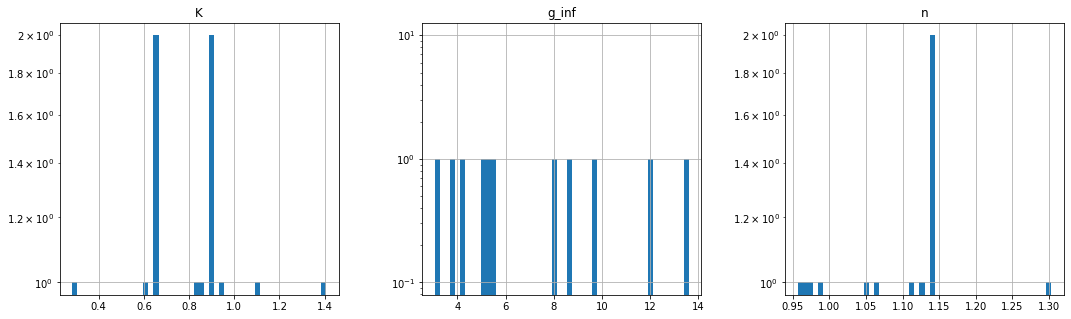

In [17]:
axs = df_sum.iloc[:, -3:].hist(bins=50, figsize=(18, 5), layout=(1, 3))
for i in range(3):
    axs[0][i].set_yscale('log')

In [18]:
df_sum['pressure_ranges'] = df_sum['pressure'].apply(lambda l: max(l) - min(l))

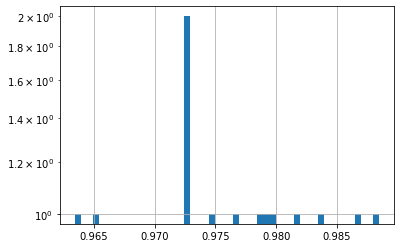

In [26]:
df_sum['pressure_ranges'][df_sum['pressure_ranges'] < 500].hist(bins=50)
plt.yscale('log')

In [27]:
df_sum['pressure_ranges'][df_sum['pressure_ranges'] <= 1]

0     0.979445
1     0.972733
2     0.976897
3     0.988491
4     0.983767
5     0.965256
6     0.974489
7     0.963417
8     0.981789
9     0.986975
10    0.979931
11    0.978851
12    0.972613
Name: pressure_ranges, dtype: float64

In [28]:
df_sum['pressure_ranges'][df_sum['pressure_ranges'] < 500].value_counts(bins=230)

(0.9884, 0.9885]    1
(0.987, 0.9871]     1
(0.9652, 0.9653]    1
(0.9726, 0.9727]    1
(0.9727, 0.9728]    1
                   ..
(0.9787, 0.9788]    0
(0.9786, 0.9787]    0
(0.9785, 0.9786]    0
(0.9784, 0.9785]    0
(0.9758, 0.976]     0
Name: pressure_ranges, Length: 230, dtype: int64

In [29]:
df_sum.to_pickle('sorbates.pkl')

https://adsorption.nist.gov/isodb/index.php?DOI=10.1002/adfm.201200084#biblio

In [30]:
df_sum.loc[[3943, 4337], ['ads_units', 'pressure', 'adsorption', 'g_inf', 'K', 'n']]

KeyError: "None of [Int64Index([3943, 4337], dtype='int64')] are in the [index]"

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

KeyError: 3943

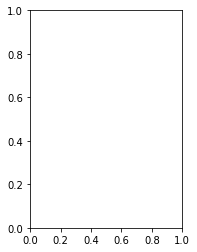

In [32]:
plt.subplot(121)
plt.plot(df_sum.loc[3943, 'pressure'], 1000*np.array(df_sum.loc[3943, 'adsorption']), 'ro--')
plt.subplot(122)
plt.plot(df_sum.loc[4337, 'pressure'], df_sum.loc[4337, 'adsorption'], 'bo--')